Este código irá:

Gerar um conjunto de dados sintético.
Treinar um modelo Bagging (Random Forest) e um modelo Boosting (Gradient Boosting).
Visualizar os limites de decisão de cada um, permitindo que a gente observe como eles abordam o problema de classificação de maneiras distintas.

Preparando o ambiente e gerando os dados...

Treinando o modelo Random Forest (Bagging)...
Acurácia do Random Forest (Bagging) no teste: 0.9167

Treinando o modelo Gradient Boosting (Boosting)...
Acurácia do Gradient Boosting (Boosting) no teste: 0.9083

Gerando alguns novos exemplos para prever...

Fazendo previsões nos novos exemplos:

Previsões do Random Forest:
  Exemplo 1 (-0.50, 0.50): Classe Prevista: 0
  Exemplo 2 (1.50, 0.00): Classe Prevista: 1
  Exemplo 3 (0.00, 0.00): Classe Prevista: 1
  Exemplo 4 (-1.00, -0.50): Classe Prevista: 0
  Exemplo 5 (0.70, 0.70): Classe Prevista: 0

Previsões do Gradient Boosting:
  Exemplo 1 (-0.50, 0.50): Classe Prevista: 0
  Exemplo 2 (1.50, 0.00): Classe Prevista: 1
  Exemplo 3 (0.00, 0.00): Classe Prevista: 1
  Exemplo 4 (-1.00, -0.50): Classe Prevista: 0
  Exemplo 5 (0.70, 0.70): Classe Prevista: 0

Gerando visualizações com os novos exemplos...


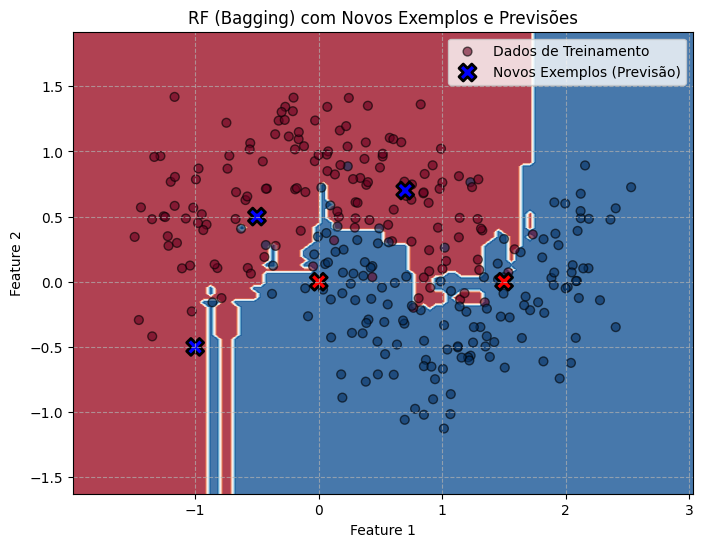

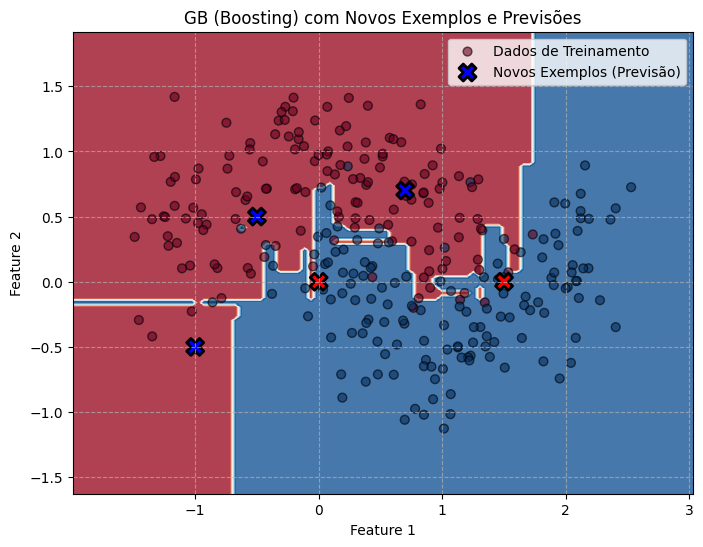


Previsões demonstradas e visualizadas!
Observe onde os 'X's verdes caem nas regiões coloridas de cada gráfico para entender a classificação do modelo.


In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

print("Preparando o ambiente e gerando os dados...")

# --- 1. Geração e Preparação dos Dados (Reutilizando o setup anterior) ---
X, y = make_moons(n_samples=400, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Treinamento dos Modelos (Reutilizando o treinamento anterior) ---

print("\nTreinando o modelo Random Forest (Bagging)...")
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
random_forest_model.fit(X_train, y_train)
y_pred_rf_test = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
print(f"Acurácia do Random Forest (Bagging) no teste: {accuracy_rf:.4f}")

print("\nTreinando o modelo Gradient Boosting (Boosting)...")
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb_test = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb_test)
print(f"Acurácia do Gradient Boosting (Boosting) no teste: {accuracy_gb:.4f}")

# --- 3. Geração de Novos Exemplos para Previsão ---
print("\nGerando alguns novos exemplos para prever...")

# Exemplos de novos pontos de dados.
# Lembre-se que cada ponto tem duas features (coordenadas x e y, no nosso caso).
new_examples = np.array([
    [-0.5,  0.5],  # Ponto 1: Provavelmente azul (esquerda superior)
    [ 1.5,  0.0],  # Ponto 2: Provavelmente vermelho (direita)
    [ 0.0,  0.0],  # Ponto 3: Ponto de transição/difícil
    [-1.0, -0.5],  # Ponto 4: Provavelmente azul (esquerda inferior)
    [ 0.7,  0.7]   # Ponto 5: Provavelmente vermelho (direita superior)
])

# Para facilitar a visualização, vamos associar uma cor real para esses pontos
# (apenas para o plot, pois eles não têm uma classe real para o modelo prever)
# Usaremos uma cor neutra ou diferente, como verde.
new_examples_labels = np.full(new_examples.shape[0], -1) # Usar -1 para indicar que são novos

# --- 4. Fazendo Previsões com os Modelos Treinados ---

print("\nFazendo previsões nos novos exemplos:")

# Previsões com Random Forest
predictions_rf = random_forest_model.predict(new_examples)
print("\nPrevisões do Random Forest:")
for i, (point, pred) in enumerate(zip(new_examples, predictions_rf)):
    print(f"  Exemplo {i+1} ({point[0]:.2f}, {point[1]:.2f}): Classe Prevista: {pred}")

# Previsões com Gradient Boosting
predictions_gb = gradient_boosting_model.predict(new_examples)
print("\nPrevisões do Gradient Boosting:")
for i, (point, pred) in enumerate(zip(new_examples, predictions_gb)):
    print(f"  Exemplo {i+1} ({point[0]:.2f}, {point[1]:.2f}): Classe Prevista: {pred}")

# --- 5. Visualização dos Novos Exemplos nos Limites de Decisão ---

# Função auxiliar para plotar os limites de decisão E os novos exemplos
def plot_decision_boundary_with_new_points(model, X_train, y_train, new_X, new_y_pred, title):
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)

    # Plota os pontos de treinamento (X_train, y_train) para contexto
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, edgecolor='k', cmap=plt.cm.RdBu, alpha=0.6, label='Dados de Treinamento')

    # Plota os novos exemplos com cores baseadas em suas previsões
    # 'o' é círculo, 'X' é cruz. Usaremos 'X' para destacar os novos pontos
    colors = ['blue' if p == 0 else 'red' for p in new_y_pred]
    plt.scatter(new_X[:, 0], new_X[:, 1], c=colors, marker='X', s=150, edgecolor='black', linewidth=2, label='Novos Exemplos (Previsão)')

    # Adiciona a legenda
    # A legenda de cores RdBu para os dados de treino pode ser um pouco redundante
    # Ajustei para focar nos novos exemplos e os dados de treino.
    plt.legend()
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("\nGerando visualizações com os novos exemplos...")

# Visualização para Random Forest com novos exemplos
plot_decision_boundary_with_new_points(random_forest_model, X_train, y_train, new_examples, predictions_rf,
                                     'RF (Bagging) com Novos Exemplos e Previsões')

# Visualização para Gradient Boosting com novos exemplos
plot_decision_boundary_with_new_points(gradient_boosting_model, X_train, y_train, new_examples, predictions_gb,
                                     'GB (Boosting) com Novos Exemplos e Previsões')

print("\nPrevisões demonstradas e visualizadas!")
print("Observe onde os 'X's verdes caem nas regiões coloridas de cada gráfico para entender a classificação do modelo.")

Preparando o ambiente para a previsão de preços de imóveis (Regressão)...
Dados de imóveis gerados: 500 amostras, 5 features.
Conjunto de Treino: 350 amostras | Conjunto de Teste: 150 amostras

--- Modelos de Ensemble para Previsão de Preço de Imóveis ---

Treinando Random Forest Regressor (Bagging)...

Resultados do Random Forest Regressor:
Mean Squared Error (MSE): 1117.29
R-squared (R2 Score): 0.9115

Treinando Gradient Boosting Regressor (Boosting)...

Resultados do Gradient Boosting Regressor:
Mean Squared Error (MSE): 1037.55
R-squared (R2 Score): 0.9178

--- Exemplo de Previsão para um Novo Imóvel Hipotético ---

Previsão do Random Forest para o novo imóvel: $127.20
Previsão do Gradient Boosting para o novo imóvel: $125.45


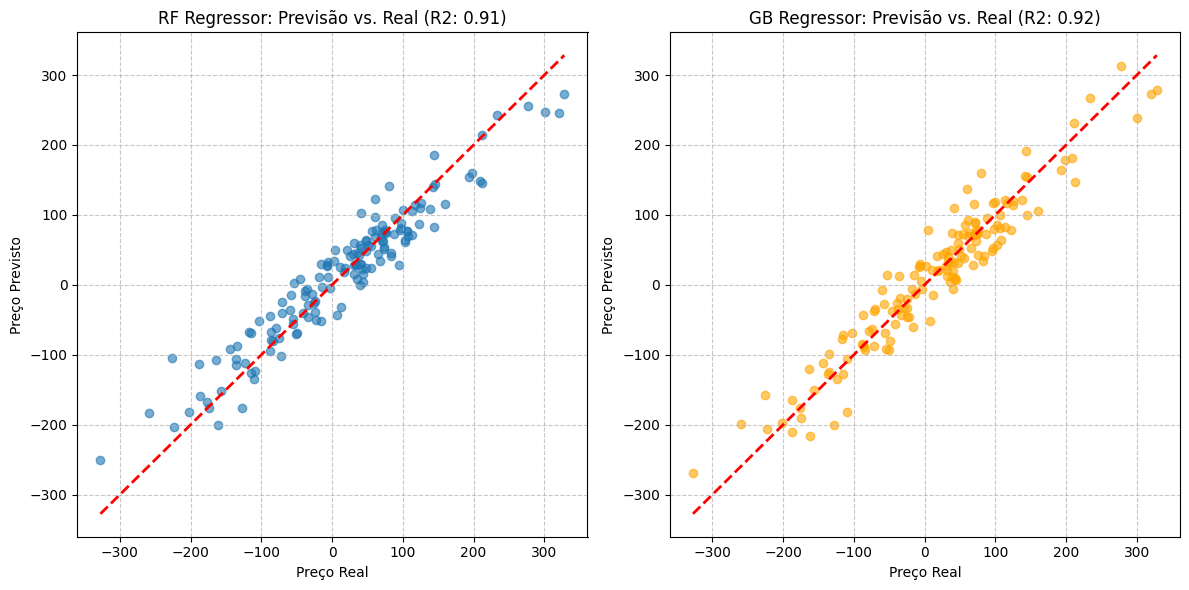


Análise de modelos Bagging e Boosting em cenário de Regressão concluída!
Observe o MSE e R-squared para comparar o desempenho dos modelos.
No gráfico, quanto mais próximos os pontos estiverem da linha pontilhada vermelha, melhor o modelo.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression # Para gerar dados de regressão sintéticos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score # Métricas de avaliação para regressão

print("Preparando o ambiente para a previsão de preços de imóveis (Regressão)...")

# --- 1. Geração e Preparação dos Dados Sintéticos para Regressão ---
# make_regression gera um dataset com features (X) e um target contínuo (y)
# n_samples: número de imóveis (observações)
# n_features: número de características do imóvel (ex: tamanho, quartos, etc.)
# noise: adiciona aleatoriedade aos dados, simulando condições reais
X, y = make_regression(n_samples=500, n_features=5, noise=15, random_state=42)

# Dividindo os dados em conjuntos de treinamento e teste
# test_size=0.3 significa que 30% dos dados serão para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dados de imóveis gerados: {X.shape[0]} amostras, {X.shape[1]} features.")
print(f"Conjunto de Treino: {X_train.shape[0]} amostras | Conjunto de Teste: {X_test.shape[0]} amostras")

# --- 2. Treinamento e Avaliação dos Modelos de Regressão ---

print("\n--- Modelos de Ensemble para Previsão de Preço de Imóveis ---")

# 2.1. Modelo BAGGGING: Random Forest Regressor
# Usa n_estimators (número de árvores) e max_depth (profundidade de cada árvore)
print("\nTreinando Random Forest Regressor (Bagging)...")
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

# Previsões e avaliação do Random Forest Regressor
y_pred_rf = rf_regressor.predict(X_test)

print("\nResultados do Random Forest Regressor:")
# Mean Squared Error (MSE): Média dos quadrados dos erros. Valores menores são melhores.
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.2f}")
# R^2 Score (Coeficiente de Determinação): Proporção da variância na variável dependente
# que é previsível a partir das variáveis independentes. Varia de 0 a 1 (ou menos para modelos ruins),
# onde 1 indica um ajuste perfeito.
print(f"R-squared (R2 Score): {r2_score(y_test, y_pred_rf):.4f}")

# 2.2. Modelo BOOSTING: Gradient Boosting Regressor
# Parâmetros: n_estimators, learning_rate (contribuição de cada árvore), max_depth
print("\nTreinando Gradient Boosting Regressor (Boosting)...")
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train, y_train)

# Previsões e avaliação do Gradient Boosting Regressor
y_pred_gb = gb_regressor.predict(X_test)

print("\nResultados do Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"R-squared (R2 Score): {r2_score(y_test, y_pred_gb):.4f}")

# --- 3. Exemplo de Previsão para um "Novo Imóvel" ---
print("\n--- Exemplo de Previsão para um Novo Imóvel Hipotético ---")

# Criando um exemplo de características para um novo imóvel
# ATENÇÃO: As 5 features (características) devem seguir a mesma ordem e escala dos dados de treinamento!
# Para este exemplo, criamos um array simples. Em um cenário real, você teria que pré-processar
# as características do novo imóvel da mesma forma que os dados de treino (e.g., escalonamento).
new_house_features = np.array([[0.5, 1.2, -0.3, 0.8, -0.1]]) # Exemplo de 5 features para um imóvel

# Previsão do Random Forest para o novo imóvel
rf_price_pred = rf_regressor.predict(new_house_features)[0]
print(f"\nPrevisão do Random Forest para o novo imóvel: ${rf_price_pred:.2f}")

# Previsão do Gradient Boosting para o novo imóvel
gb_price_pred = gb_regressor.predict(new_house_features)[0]
print(f"Previsão do Gradient Boosting para o novo imóvel: ${gb_price_pred:.2f}")

# --- 4. Visualização Simples das Previsões vs. Real (em uma feature) ---
# Como temos 5 features, é difícil plotar todas. Vamos plotar o real vs. previstos para uma feature.
# A visualização é mais genérica para regressão do que os limites de decisão para classificação.
plt.figure(figsize=(12, 6))

# Plot para Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha de perfeição
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title(f"RF Regressor: Previsão vs. Real (R2: {r2_score(y_test, y_pred_rf):.2f})")
plt.grid(True, linestyle='--', alpha=0.7)

# Plot para Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha de perfeição
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title(f"GB Regressor: Previsão vs. Real (R2: {r2_score(y_test, y_pred_gb):.2f})")
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nAnálise de modelos Bagging e Boosting em cenário de Regressão concluída!")
print("Observe o MSE e R-squared para comparar o desempenho dos modelos.")
print("No gráfico, quanto mais próximos os pontos estiverem da linha pontilhada vermelha, melhor o modelo.")